# Predicting Diabetes

## Import Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# do plotting inline instead of a seperate window
%matplotlib inline


# Load and review data

In [21]:
df=pd.read_csv("./data/pima-data.csv") #Load pima data

In [22]:
df.shape

(768, 10)

In [23]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [24]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


## Check for null values

In [25]:
df.isnull().values.any()

False

In [26]:
def plot_corr(df, size=12):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """
    
    corr=df.corr()     # dataframe correlation function
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
        

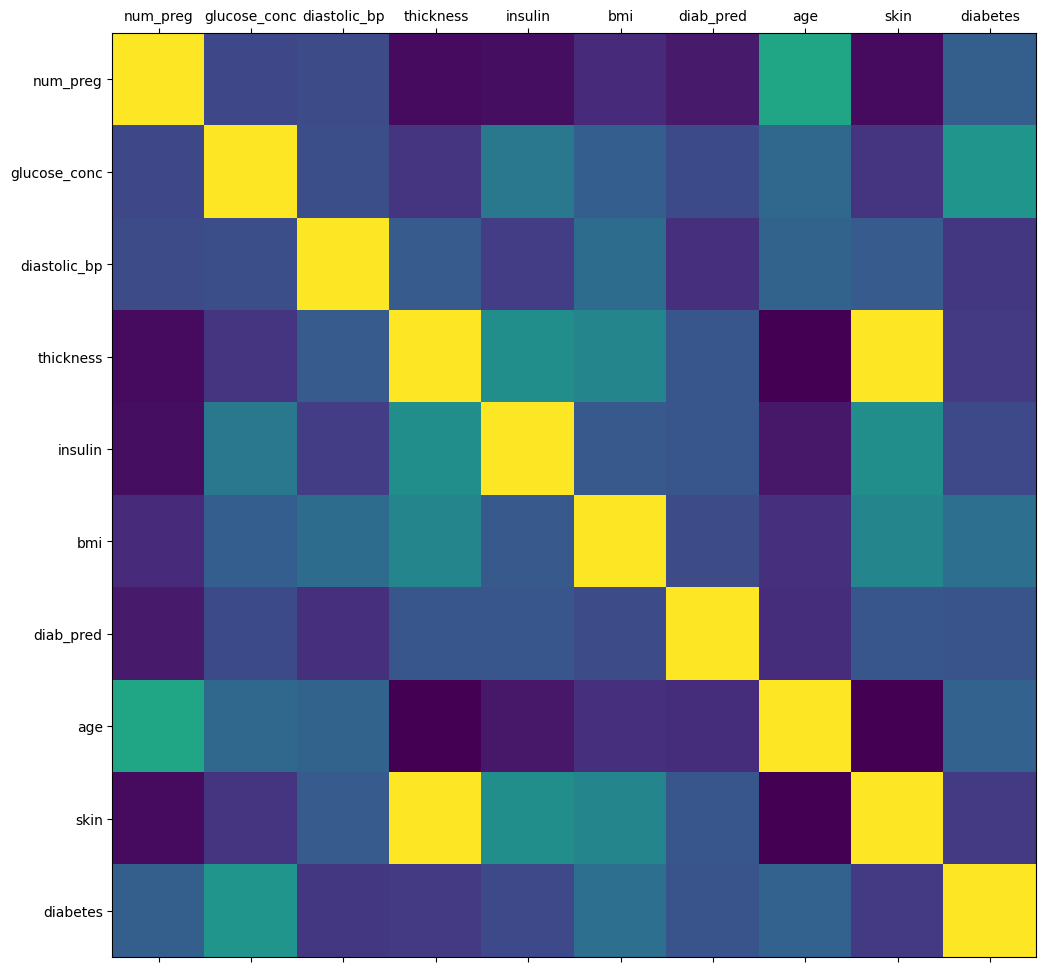

In [27]:
plot_corr(df)

In [28]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [29]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [30]:
del df['skin']

In [31]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


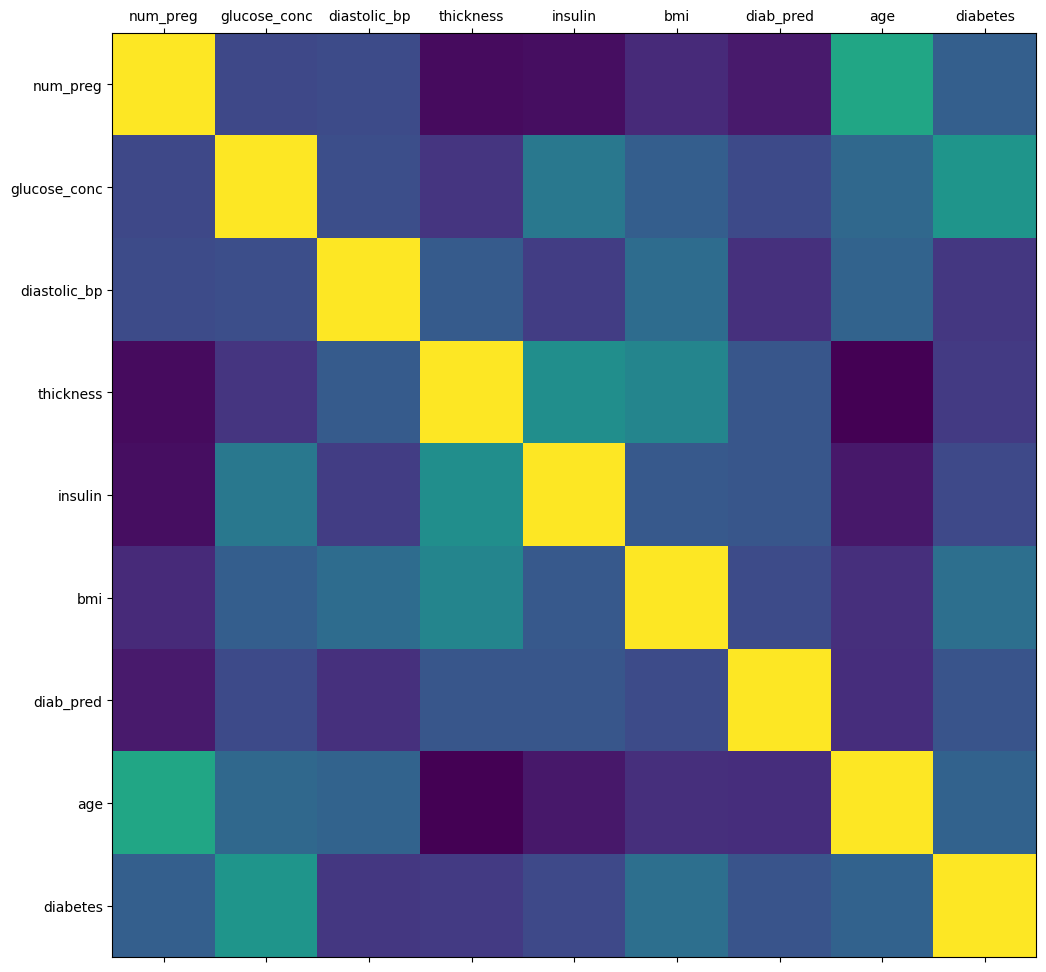

In [32]:
plot_corr(df)

## Check Data Types

In [33]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Change True to 1 and False to 0

In [34]:
diabetes_map={True:1,False:0}

In [35]:
df['diabetes']=df['diabetes'].map(diabetes_map)

In [36]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
num_true=len(df.loc[df['diabetes']==True])
num_false=len(df.loc[df['diabetes']==False])
print("Number of true cases: {0} ({1:2.2f}%)".format(num_true, num_true/len(df)*100))
print("Number of false cases: {0} ({1:2.2f}%)".format(num_false,num_false/len(df)*100))

Number of true cases: 268 (34.90%)
Number of false cases: 500 (65.10%)


## Splitting the data
70% for training, 30% for testing

In [39]:
from sklearn.model_selection import train_test_split
features_col_names=['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']
predicted_class_names=['diabetes']

X=df[features_col_names].values       #predictor feature columns (8xm)
y=df[predicted_class_names].values    #predicted class (1=true, 0=false) column (1xm)
split_test_size=.30
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=split_test_size,random_state=42)


We check to ensure we have the desired 70% train, 30% test split of the data

In [40]:
print("{0:0.2f}% in training set".format(len(X_train)/len(df)*100))
print("{0:0.2f}% in test set".format(len(X_test)/len(df)*100))

69.92% in training set
30.08% in test set


In [41]:
"{0:0.2f}%".format(len(X_test)/len(df)*100)

'30.08%'

## Verifying predicted value was split correctly

In [42]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


### Post-split Data Preparation

#### Hidden Missing Values

In [43]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Are these 0 values possible?

How many rows have have unexpected 0 values?

In [44]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


#### Impute with mean

In [45]:
from sklearn.impute import SimpleImputer

#Impute with mean all 0 readings
fill_0=SimpleImputer(missing_values=0,strategy="mean")

X_train=fill_0.fit_transform(X_train)
X_test=fill_0.fit_transform(X_test)


## Training Initial Algorithm - Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

#Create Gaussian Naive Bayes model object and train it with data
nb_model=GaussianNB()

nb_model.fit(X_train,y_train.ravel())



GaussianNB()

### Performance on Training Data

In [47]:
#predict values using the training data
nb_predict_train =nb_model.predict(X_train)

#import the performance metrics library
from sklearn import metrics


#Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,nb_predict_train)))
print()


Accuracy: 0.7542



### Performance on Testing Data

In [48]:
#Predict values using the testing data
nb_predict_test=nb_model.predict(X_test)

#training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,nb_predict_test)))
print()

Accuracy: 0.7359



#### Metrics

In [49]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test,nb_predict_test)))
print()

print("Classification Report")
print(metrics.classification_report(y_test,nb_predict_test))


Confusion Matrix
[[118  33]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=42, n_estimators=10)
rf_model.fit(X_train,y_train.flatten())



RandomForestClassifier(n_estimators=10, random_state=42)

### Predict Training Data

In [52]:
rf_predict_train=rf_model.predict(X_train)
#training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,rf_predict_train)))

Accuracy: 0.9870


### Predict Test Data

In [53]:
rf_predict_test=rf_model.predict(X_test)

#training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,rf_predict_test)))

Accuracy: 0.7013


### Metrics

In [54]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test,rf_predict_test)))
print()

print("Classification Report")
print(metrics.classification_report(y_test,rf_predict_test))

Confusion Matrix
[[120  31]
 [ 38  42]]

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       151
           1       0.58      0.53      0.55        80

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.70      0.70      0.70       231



### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression(C=0.7,random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(X_train,y_train.flatten())
lr_predict_test=lr_model.predict(X_test)

#training mertics
#training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,lr_predict_test)))
print()
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test,lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(y_test,lr_predict_test))

Accuracy: 0.7446

Confusion Matrix
[[128  23]
 [ 36  44]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



### Setting regularization parameters

1st max value of 0.613 occured at C=1.400


Text(0, 0.5, 'recall score')

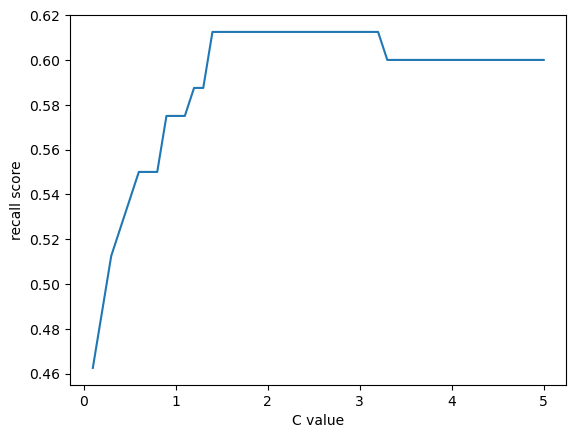

In [56]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(X_train, y_train.flatten())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [57]:
type(recall_scores)

list

In [58]:
! python --version

Python 3.11.3


In [59]:
%ls

Data/                  Pima-Prediction.ipynb  Readme.md


### Logistic regression with class_weight='balanced'

1st max value of 0.738 occured at C=0.300


Text(0, 0.5, 'recall score')

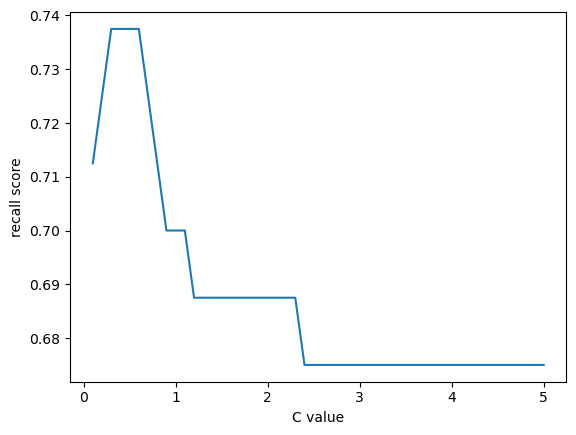

In [60]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val,class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(X_train, y_train.flatten())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [61]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression(class_weight="balanced",C=best_score_C_val,random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(X_train,y_train.flatten())
lr_predict_test=lr_model.predict(X_test)

#training mertics
#training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,lr_predict_test)))
print()
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test,lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(y_test,lr_predict_test))
print(metrics.recall_score(y_test,lr_predict_test))

Accuracy: 0.7143

Confusion Matrix
[[106  45]
 [ 21  59]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       151
           1       0.57      0.74      0.64        80

    accuracy                           0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.71      0.72       231

0.7375


### LogisticRegressionCV

In [64]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model=LogisticRegressionCV(n_jobs=-1,random_state=42,Cs=3,cv=10,refit=False, class_weight="balanced", solver='liblinear', max_iter=10000)
lr_cv_model.fit(X_train,y_train.flatten())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, max_iter=10000,
                     n_jobs=-1, random_state=42, refit=False,
                     solver='liblinear')

### Predict on Test data

In [65]:
lr_cv_predict_test=lr_cv_model.predict(X_test)

#training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,lr_cv_predict_test)))
print()
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test,lr_cv_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test,lr_cv_predict_test))

Accuracy: 0.7143

Confusion Matrix
[[110  41]
 [ 25  55]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       151
           1       0.57      0.69      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.71      0.70       231
weighted avg       0.73      0.71      0.72       231

